In [1]:
import pandas as pd 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os

In [2]:
df=pd.read_parquet(r"C:\Users\beher\jupyterZ\Amex_credit\cleaned.parquet")

In [4]:
df

,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,...,D_92,D_93,D_94,R_24,R_25,D_96,B_36,D_127,R_28,target
5233647,0.034339,0.747856,0.006700,0.746436,0.018307,0.002869,0.771965,0.747538,0.009024,0.631909,...,0.009986,0.009383,0.000043,0.004732,0.003264,0.009861,0.000546,0.005012,0.004065,1
624859,0.003578,0.022780,0.001939,0.264557,1.215785,0.004925,0.290308,0.082434,0.007047,0.058135,...,0.008385,0.003475,0.002786,0.005189,0.005171,0.000042,0.005912,0.007893,0.006287,1
196467,0.002815,0.223541,0.004304,0.477318,0.009385,0.009953,0.106766,0.421082,0.002987,0.643473,...,0.008034,0.006153,0.008948,0.002648,0.009031,0.005936,0.001024,0.005549,0.006636,1
2567179,0.004623,0.496836,0.503342,0.186215,0.015503,1.007506,0.335911,0.381861,0.006144,0.647353,...,0.005279,0.001795,0.009014,1.005017,0.000974,0.002166,0.000631,0.005468,0.002364,1
2262515,0.007338,0.153364,0.001225,0.060192,0.005520,0.003316,0.006708,0.069092,0.000596,0.434987,...,0.007677,0.003418,0.004302,0.007324,0.005564,0.008930,0.007103,0.002653,0.005468,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.416013,0.020818,0.003487,0.000029,0.035575,0.002472,0.530723,0.018121,0.008060,0.013776,...,0.001110,0.002321,0.009730,0.008740,0.003061,0.009790,0.003618,1.009286,0.007069,0
5531447,0.296536,0.007209,0.005904,0.014354,0.029612,0.008717,0.534473,0.021853,0.004997,0.005645,...,0.003200,0.000006,0.000904,0.003348,0.008171,0.002250,0.006475,1.004053,0.002056,0
5531448,0.443984,0.013151,0.003457,0.016425,0.011857,0.008366,0.530051,0.016139,0.007014,0.004090,...,0.009890,0.004017,0.008775,0.008632,0.007456,0.008068,0.004272,1.009079,0.005076,0
5531449,0.442553,0.009855,0.005117,0.004424,0.019532,0.004704,0.531355,0.014798,0.003183,0.006628,...,0.006691,0.004250,0.000502,0.000088,0.000126,0.000636,0.006566,1.000004,0.008682,0


In [5]:
df.isna().sum()

D_39      0
B_1       0
R_1       0
B_4       0
B_5       0
         ..
D_96      0
B_36      0
D_127     0
R_28      0
target    0
Length: 67, dtype: int64

In [7]:
X=df[['B_9', 'D_75', 'D_58', 'B_7', 'B_23', 'B_4', 'B_1', 'B_11', 'R_1',
       'R_3', 'R_2', 'P_4', 'R_10', 'B_28', 'R_4', 'S_15', 'D_39', 'R_5',
       'R_8']]
y=df['target']

In [8]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.98, shuffle=True, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5,shuffle=True,random_state=100)

# LR

In [9]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=2.0,random_state=44)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.8248783372350093
LogisticRegressionModel Test Score is :  0.8268589519808357


In [14]:
CrossValidateValues2 = cross_validate(LogisticRegressionModel, X_val, y_val, cv=5, return_train_score = True)

# Showing Results
print('Train Score Value : ', CrossValidateValues2['train_score'])
print('Test Score Value : ', CrossValidateValues2['test_score'])
print('Fit Time : ', CrossValidateValues2['fit_time'])
print('Score Time : ', CrossValidateValues2['score_time'])

C:\Users\beher\jupyterZ\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\beher\jupyterZ\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\beher\jupyterZ\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\beher\jupyterZ\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train Score Value :  [0.82550861 0.8242924  0.82465354 0.82525543 0.82388612]
Test Score Value :  [0.8228709  0.82659203 0.823101   0.82165643 0.82743469]
Fit Time :  [2.21781111 2.36947274 2.22838211 2.01893997 1.9758122 ]
Score Time :  [0.00628924 0.00697398 0.00700498 0.         0.0040555 ]


C:\Users\beher\jupyterZ\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


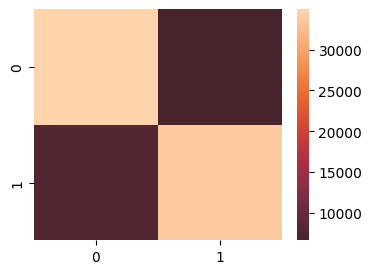

Confusion Matrix is
 [[34929  6676]
 [ 7707 33759]]


In [15]:
y_pred = LogisticRegressionModel.predict(X_test)

plt.figure(figsize=(4,3))
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center=True)
plt.show()

print('Confusion Matrix is\n', CM)

In [16]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     41605
           1       0.83      0.81      0.82     41466

    accuracy                           0.83     83071
   macro avg       0.83      0.83      0.83     83071
weighted avg       0.83      0.83      0.83     83071

0.8268589519808357


# XGB

In [10]:
XGBClassifierModel = XGBClassifier(n_estimators=100, max_depth=15, eta=0.01, subsample=0.6, colsample_bytree=0.8) 
XGBClassifierModel.fit(X_train, y_train)

#Calculating Details
print('XGBClassifierModel Train Score is : ' , XGBClassifierModel.score(X_train, y_train))
print('XGBClassifierModel Test Score is : ' , XGBClassifierModel.score(X_test, y_test))

XGBClassifierModel Train Score is :  0.8587661679613156
XGBClassifierModel Test Score is :  0.8537877237543788


In [11]:
CrossValidateValues4 = cross_validate(XGBClassifierModel, X_val, y_val, cv=5, return_train_score = True)

# Showing Results
print('Train Score Value : ', CrossValidateValues4['train_score'])
print('Test Score Value : ', CrossValidateValues4['test_score'])
print('Fit Time : ', CrossValidateValues4['fit_time'])
print('Score Time : ', CrossValidateValues4['score_time'])

Train Score Value :  [0.91239316 0.91240953 0.91256    0.91314685 0.9117324 ]
Test Score Value :  [0.83153777 0.8378476  0.83700494 0.83459733 0.83519923]
Fit Time :  [20.38139033 20.09104681 20.05054736 20.18304634 20.97030354]
Score Time :  [0.03878236 0.07207608 0.04919958 0.04988432 0.07047439]


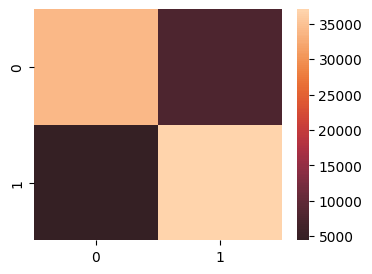

Confusion Matrix is
 [[33893  7712]
 [ 4434 37032]]


In [12]:
y_pred_x = XGBClassifierModel.predict(X_test)
CM_x = confusion_matrix(y_test, y_pred_x)

plt.figure(figsize=(4,3))
sns.heatmap(CM_x, center=True)
plt.show()

print('Confusion Matrix is\n', CM_x)

In [13]:
print(classification_report(y_test, y_pred_x))
print(accuracy_score(y_test, y_pred_x))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85     41605
           1       0.83      0.89      0.86     41466

    accuracy                           0.85     83071
   macro avg       0.86      0.85      0.85     83071
weighted avg       0.86      0.85      0.85     83071

0.8537877237543788
